<a href="https://colab.research.google.com/github/Madfury0/Yolov8_usecase/blob/main/Yolov8_show_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook introduces YOLO at a beginner level on how to download and access various features it provides.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Installing ultralytics, which is the Library that has all versions of YOLO.

In [ ]:
%pip install ultralytics

Downloading the model.
At this point, you can choose to retrain the model on custom data for specialized use case.

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO model
model = YOLO("yolov8n.pt") #uses the entire model for prediction

"""
For training custom data, use model.train(data = training_data, epochs = number of epochs)
"""

Saving the model allows easy access of the model instead of downloading every time.

In [ ]:
model.save("/content/drive/MyDrive/models/yolov8n.pt")

Load method is used to load the model in memory.

In [ ]:
model.load("/content/drive/MyDrive/models/yolov8n.pt")

Viewing and displaying images in python can be achieved in various ways. In this case, I tried using OpenCV and PIL but they both seem to be crashing the systems in Colab. Google has recommended use of....

In [ ]:
import cv2
from PIL import Image

img_path = "/content/drive/MyDrive/Test_img/test/1200px-2019_Toyota_Corolla_Icon_Tech_VVT-i_Hybrid_1.8.jpg"
img = Image.open(img_path)
#img = cv2.imread(img_path)
#cv2.imshow(img)
print (img.size)
img.show (img)

(1200, 632)


In [ ]:
#from PIL
results = model.predict(source=img, save=True)  # save plotted images

Predicting can be carried in various ways as showcased below.

In [ ]:
#returns a list of 79 items
results = model.predict(source=img_path, show=True)  # Display preds. Accepts all YOLO predict arguments

In [ ]:
#youtube inferencing
source = "https://youtu.be/ldhCVp1T94g?si=n992eOaZVg9i64gN"
results = model.predict(source, stream = True)

The following cells introduces supervision library.It is a library that simplifies usage of different models in python.
I'm currently using version 0.23.0

Credits: https://github.com/roboflow/supervision

In [ ]:
!pip install -q supervision

import supervision as sv

print(sv.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 6.5 MB/s eta 0:00:00
0.23.0


We run pass our image through model for predictions. By using supervision, we can access the Detections class that has various methods for working with our image. Some useful methods are class_id and confidence that will be showcased on how they can be used to create a list of detected objects and annotate the objects in the image with their corresponding labels.

In [ ]:
result = model(img_path, verbose=False)[0]
detections = sv.Detections.from_ultralytics(result)

In [ ]:
print ("detections:", len(detections))
print (type(detections))
print (dir(detections))

detections: 3
<class 'supervision.detection.core.Detections'>
['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'area', 'box_area', 'class_id', 'confidence', 'data', 'empty', 'from_azure_analyze_image', 'from_deepsparse', 'from_detectron2', 'from_inference', 'from_lmm', 'from_mmdetection', 'from_paddledet', 'from_sam', 'from_tensorflow', 'from_transformers', 'from_ultralytics', 'from_yolo_nas', 'from_yolov5', 'get_anchors_coordinates', 'is_empty', 'mask', 'merge', 'tracker_id', 'with_nmm', 'with_nms', 'xyxy']


We can use a for loop to iterate over all the objects detected providing their corresponding class id and confidence level. The class id can be used to index the corresponding name of the object from the names list. This information is useful and can be used to perform various functions depending on the use case of the model. In this, I chose a simple warning message that shows how a braking logic can be implemented if a car is detected.

In [ ]:
for class_id, conf in zip (detections.class_id, detections.confidence):
    #print(model.model.names[class_id], ":" , conf)
    obstacle = model.model.names[class_id]
    confidence = conf
    #simple use case of YOLO
    #self driving car to slow down on detecting another car
    if "car" in obstacle and confidence >= 0.3:
        print ("slow down your roll")
    else:
        print ("run like hell")

slow down your roll
slow down your roll


Annotations can be drawn on the detected images using supervision library as shown below.
This allows easier visualization of the detected objects in a given frame.

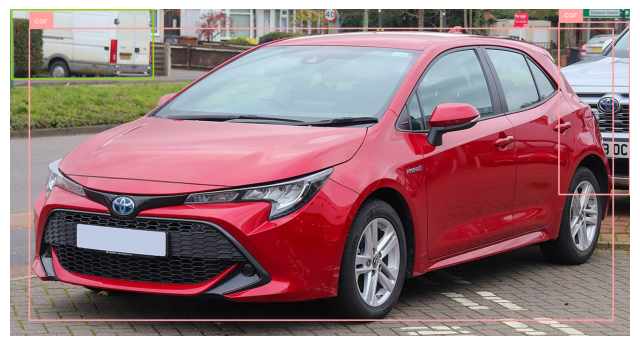

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(img.copy(), detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(image=annotated_image, size=(8, 8))

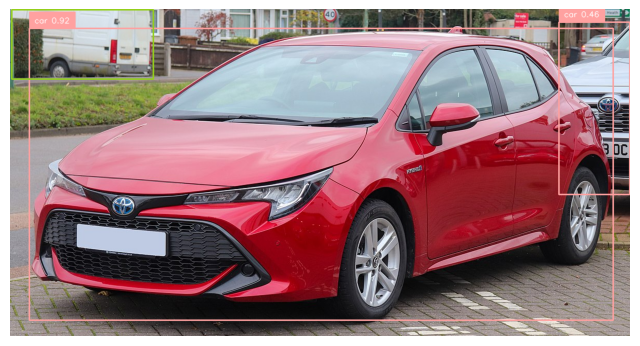

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence in zip(detections.class_id, detections.confidence)
]
annotated_image = box_annotator.annotate(
    img.copy(),
    detections=detections,
)
annotated_image = label_annotator.annotate(
    annotated_image, detections=detections, labels=labels
)

sv.plot_image(image=annotated_image, size=(8, 8))